# Import the libraries

In [1]:
## for data
import pandas as pd
import numpy as np
import os

## for plotting
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Get the Data

In [2]:
DATA_PATH="./Datasets/BX-CSV-Dump/"
ratings=pd.read_csv(os.path.join(DATA_PATH,"BX-Book-Ratings.csv"),warn_bad_lines=False, sep=';', error_bad_lines=False, encoding="latin-1")
books=pd.read_csv(os.path.join(DATA_PATH,"BX-Books.csv"), sep=';',warn_bad_lines=False, error_bad_lines=False, encoding="latin-1")
users=pd.read_csv(os.path.join(DATA_PATH,"BX-Users.csv"), sep=';',warn_bad_lines=False, error_bad_lines=False, encoding="latin-1")

In [3]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [4]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [5]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [6]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [7]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [8]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


# Clean the Data


In [9]:
books.columns=['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher','imageUrlS', 'imageUrM', 'imageUrL']
users.columns=['userID', 'Location', 'Age']
ratings.columns=['userID', 'ISBN', 'bookRating']

In [10]:
users.isna().sum()

userID           0
Location         0
Age         110762
dtype: int64

In [11]:
users.drop(columns=['Age'],inplace=True)

In [12]:
books.isna().sum()

ISBN                 0
bookTitle            0
bookAuthor           1
yearOfPublication    0
publisher            2
imageUrlS            0
imageUrM             0
imageUrL             3
dtype: int64

In [13]:
books.dropna(inplace=True)

In [14]:
ratings.isna().sum()

userID        0
ISBN          0
bookRating    0
dtype: int64

## Explore the Data

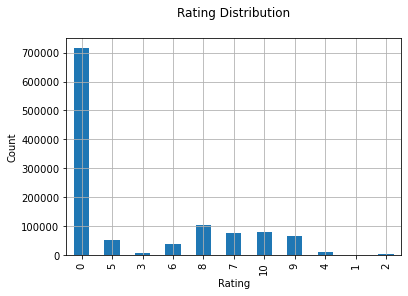

In [15]:
ratings['bookRating'].value_counts(sort=False).plot(kind='bar')
plt.grid()

plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

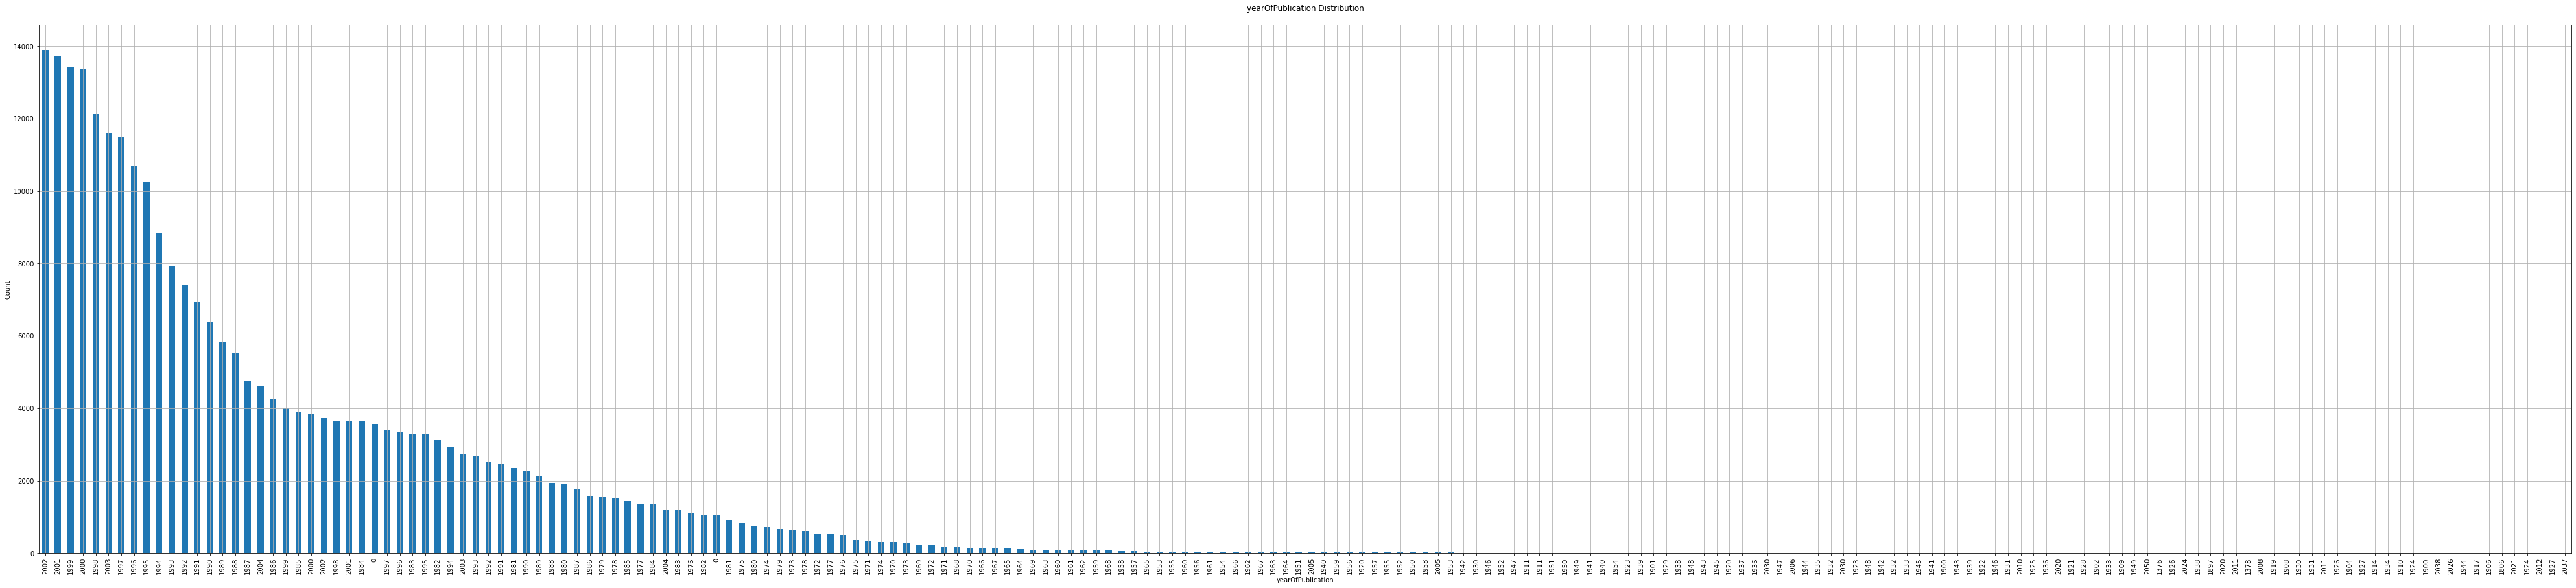

In [16]:
plt.figure(figsize=(70,15))

books['yearOfPublication'].value_counts().plot(kind='bar')
plt.xticks(rotation=90)
plt.grid()
plt.title('yearOfPublication Distribution\n')
plt.xlabel('yearOfPublication')
plt.ylabel('Count')
plt.show()


### a) Recommendation Based on Rating Counts¶


In [17]:
TopRatingCounts=pd.DataFrame(ratings['ISBN'].value_counts().head()).reset_index()
TopRatingCounts.columns=['ISBN','COUNTS']
TopRatingCounts

,ISBN,COUNTS
0,0971880107,2502
1,0316666343,1295
2,0385504209,883
3,0060928336,732
4,0312195516,723


In [18]:
TopRatingCounts.merge(books,on='ISBN')

,ISBN,COUNTS,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrM,imageUrL
0,0971880107,2502,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...
1,0316666343,1295,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...
2,0385504209,883,The Da Vinci Code,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...
3,0060928336,732,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...
4,0312195516,723,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...


In [19]:
print("Top Recommended books based in rating counts")
print("--------------------------------------------")

list(TopRatingCounts.merge(books,on='ISBN')['bookTitle'].values)

Top Recommended books based in rating counts
--------------------------------------------


['Wild Animus',
 'The Lovely Bones: A Novel',
 'The Da Vinci Code',
 'Divine Secrets of the Ya-Ya Sisterhood: A Novel',
 'The Red Tent (Bestselling Backlist)']

In [20]:
avg_rating_perBook=pd.DataFrame(ratings.groupby("ISBN")['bookRating'].mean()).reset_index()
avg_rating_perBook.head()

,ISBN,bookRating
0,0330299891,3.0
1,0375404120,1.5
2,0586045007,0.0
3,9022906116,3.5
4,9032803328,0.0


In [21]:
raitning_CountPerBook=pd.DataFrame(ratings.groupby("ISBN")['bookRating'].count()).reset_index()
raitning_CountPerBook.head()

,ISBN,bookRating
0,0330299891,2
1,0375404120,2
2,0586045007,1
3,9022906116,2
4,9032803328,1


In [22]:
books_features=avg_rating_perBook.merge(raitning_CountPerBook,on='ISBN',suffixes=('_Avg',"_Counts"))
books_features.sort_values('bookRating_Counts',ascending=False).head()

,ISBN,bookRating_Avg,bookRating_Counts
247408,0971880107,1.019584,2502
47371,0316666343,4.468726,1295
83359,0385504209,4.652322,883
9637,0060928336,3.448087,732
41007,0312195516,4.334716,723


We Cant depend on Number bookRating Counts to know top books

# Collaborative Filtering Using k-Nearest Neighbors (kNN)

In [23]:
bookRating=books.merge(ratings,on='ISBN')

In [24]:
bookRating=bookRating[['userID','ISBN','bookTitle','bookRating']]

In [25]:
bookRating.head()

,userID,ISBN,bookTitle,bookRating
0,2,0195153448,Classical Mythology,0
1,8,0002005018,Clara Callan,5
2,11400,0002005018,Clara Callan,0
3,11676,0002005018,Clara Callan,8
4,41385,0002005018,Clara Callan,0


In [26]:
ratingCounting=pd.DataFrame(bookRating['bookTitle'].value_counts()).reset_index()
ratingCounting.columns=['bookTitle','ratingCounting']

In [27]:
data=bookRating.merge(ratingCounting,on='bookTitle')

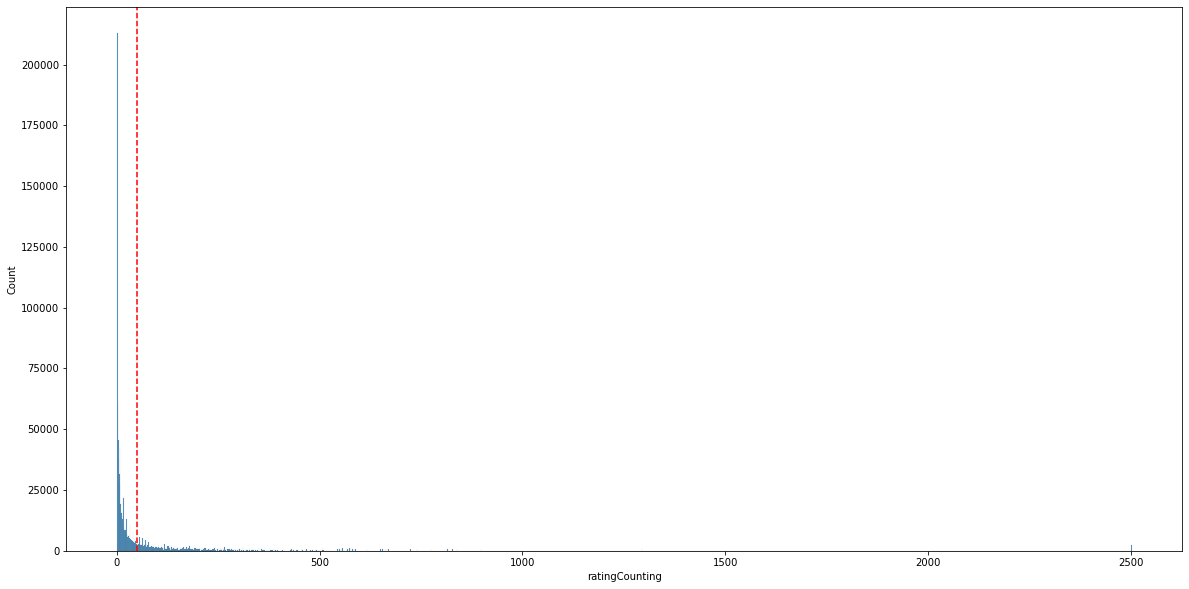

In [28]:
#data_w_TotalRating['totalRatingCount'].hist(bins=20);
plt.figure(figsize=(20,10))
sns.histplot(data['ratingCounting'])
plt.axvline(50, 0, 1,c='r',ls='--')
plt.show()

In [29]:
data=data[data['ratingCounting']>=50]

In [30]:
data.head()

,userID,ISBN,bookTitle,bookRating,ratingCounting
31,8,0399135782,The Kitchen God's Wife,0,311
32,11676,0399135782,The Kitchen God's Wife,9,311
33,29526,0399135782,The Kitchen God's Wife,9,311
34,36836,0399135782,The Kitchen God's Wife,0,311
35,46398,0399135782,The Kitchen God's Wife,9,311


In [31]:
full_data=data.merge(users,on='userID')

In [32]:
full_data.head()

,userID,ISBN,bookTitle,bookRating,ratingCounting,Location
0,8,0399135782,The Kitchen God's Wife,0,311,"timmins, ontario, canada"
1,8,1558746218,A Second Chicken Soup for the Woman's Soul (Ch...,0,56,"timmins, ontario, canada"
2,11676,0399135782,The Kitchen God's Wife,9,311,"n/a, n/a, n/a"
3,11676,080410753X,The Kitchen God's Wife,8,311,"n/a, n/a, n/a"
4,11676,1558746226,A Second Chicken Soup for the Woman's Soul (Ch...,9,56,"n/a, n/a, n/a"


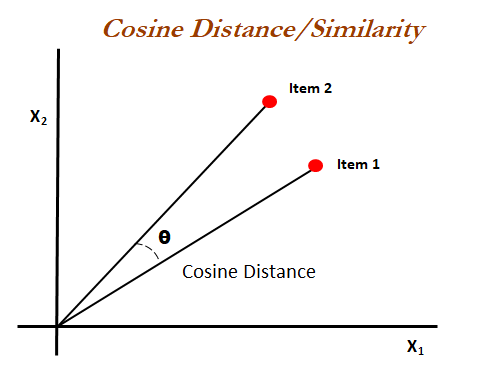

In [33]:
featuesOfBooks=full_data.pivot_table(index='bookTitle',columns='userID',values='bookRating').fillna(0)

In [34]:
from scipy.sparse import csc_matrix
from sklearn.neighbors import NearestNeighbors

In [35]:
featuesOfBooks_matrix=csc_matrix(featuesOfBooks.values)

In [36]:
model=NearestNeighbors(metric='cosine',algorithm='brute')
model.fit(featuesOfBooks_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [37]:
# chooseing random book to see the similarty
random_index=np.random.choice(featuesOfBooks.shape[0])
distance,indices=model.kneighbors(featuesOfBooks.iloc[random_index,:].values.reshape(1,-1),n_neighbors=5)
Dict=dict(zip(indices.flatten(),distance.flatten()))

# Print similer movies
print("Recommendation for who read this book: ",featuesOfBooks.index[random_index],"\n")
for i,d in Dict.items():
    if featuesOfBooks.index[random_index] == featuesOfBooks.index[i]:
        pass
    else:
        print("{0}: similar to the book with {1} %".format(featuesOfBooks.index[i],round(d*100,2)))



Recommendation for who read this book:  Dangerous to Know 

A Season Beyond a Kiss: similar to the book with 89.55 %
The Bourne Identity: similar to the book with 90.22 %
Lucky's Lady: similar to the book with 90.35 %
Now You See Her: similar to the book with 91.68 %


# Looking for users haveing similar  taste

In [38]:
featuesOfUsers=full_data.pivot_table(index='userID',columns='bookTitle',values='bookRating').fillna(0)
featuesOfUsers_matrix=csc_matrix(featuesOfUsers.values)
model_4_users=NearestNeighbors(metric='cosine',algorithm='brute')
model_4_users.fit(featuesOfUsers_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [41]:
# chooseing random movie to see the similarty
random_index=np.random.choice(featuesOfUsers.shape[0])
distance,indices=model_4_users.kneighbors(featuesOfUsers.iloc[random_index,:].values.reshape(1,-1),n_neighbors=35)


Dict=dict(zip(indices.flatten(),distance.flatten()))

# Print similer movies
print("User: ",featuesOfUsers.index[random_index],"\n")
for i,d in Dict.items():
    if featuesOfUsers.index[random_index] == featuesOfUsers.index[i]:
        pass
    else:
        print("User {0} have similer test with {1}%".format(featuesOfUsers.index[i],round(d*100,2)))


User:  9357 

User 162868 have similer test with 21.55%
User 99354 have similer test with 44.53%
User 159682 have similer test with 44.53%
User 7441 have similer test with 44.53%
User 184587 have similer test with 44.53%
User 45643 have similer test with 44.53%
User 272982 have similer test with 52.43%
User 125143 have similer test with 58.25%
User 38741 have similer test with 58.54%
User 219924 have similer test with 61.52%
User 39441 have similer test with 63.37%
User 138097 have similer test with 67.1%
User 206438 have similer test with 68.53%
User 245373 have similer test with 69.16%
User 225731 have similer test with 70.01%
User 33580 have similer test with 70.96%
User 106280 have similer test with 71.04%
User 134311 have similer test with 72.2%
User 149672 have similer test with 72.26%
User 137856 have similer test with 72.26%
User 200878 have similer test with 72.26%
User 213518 have similer test with 72.26%
User 42937 have similer test with 72.26%
User 84692 have similer test w